# Credit Card Fraud

In this activity, you will practice resampling techniques and use different models to classify credit card transactions as fraud or not fraud. 

The dataset includes transactions that were discovered as fraudulent (Class = 1) as well as non-fraudulent (Class = 0). The variables are PCA-decomposed and anonymized to protect customers' identities, except for the Amount variable. 

In [1]:
import pandas as pd
from pathlib import Path
from collections import Counter

In [2]:
data = Path('../Resources/cc_fraud.csv')
df = pd.read_csv(data)

In [3]:
x_cols = [i for i in df.columns if i not in ('Class','Unnamed: 0')]
X = df[x_cols]
y = df['Class']

In [4]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Oversample

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 7516, 1: 7516})

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=2000)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
from imblearn.metrics import classification_report_imbalanced

y_pred = model.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.90      0.99      0.94      0.90      2484
          1       0.82      0.90      0.99      0.86      0.94      0.88       139

avg / total       0.98      0.98      0.90      0.98      0.94      0.90      2623



## Undersample

In [8]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 353, 1: 353})

In [9]:
model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=2000)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
from imblearn.metrics import classification_report_imbalanced

y_pred = model.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.93      0.92      0.96      0.92      0.86      2484
          1       0.42      0.92      0.93      0.58      0.92      0.85       139

avg / total       0.96      0.93      0.92      0.94      0.92      0.86      2623



## Combination Sampling

In [11]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 7292, 1: 7462})

In [12]:
model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=2000)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from imblearn.metrics import classification_report_imbalanced

y_pred = model.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.91      0.99      0.95      0.90      2484
          1       0.82      0.91      0.99      0.86      0.95      0.89       139

avg / total       0.99      0.98      0.91      0.98      0.95      0.90      2623



## Ensemble

In [14]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=1000,
                               n_jobs=None, oob_score=False, random_state=1,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [15]:
y_pred_rf = brf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      0.91      0.99      0.94      0.90      2484
          1       0.76      0.91      0.98      0.83      0.94      0.89       139

avg / total       0.98      0.98      0.91      0.98      0.94      0.90      2623



# Precision Recall Curve

In [16]:
from sklearn.metrics import precision_recall_curve

probs_lr = model.predict_proba(X_test)[:, 1]
probs_rf = brf.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr, pos_label=1)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf, pos_label=1)

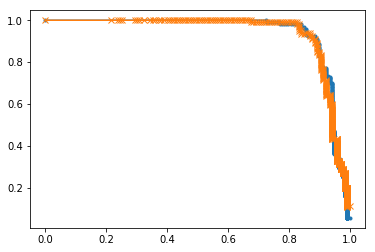

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall_lr, precision_lr, marker='.')
plt.plot(recall_rf, precision_rf, marker='x')